<a href="https://colab.research.google.com/github/sandilyabaruah3023/Object-Detection-IITG-Project-/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This command installs the 'ultralytics' library, which is required to use YOLOv8.
# The '-q' flag ensures a quiet installation with minimal output.

%pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00


In [2]:
# We import all the necessary modules for our object detection task.
# 1. YOLO: The core class from the ultralytics library for running the model.
# 2. cv2: The OpenCV library, used for reading, drawing on, and handling images.
# 3. google.colab.patches.cv2_imshow: A special function to display OpenCV images within a Google Colab notebook.
# 4. files: A module from google.colab to handle file uploads.
# 5. os: The operating system module, used here to check if the file exists.

from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Please upload the image(s) you want to analyze.


Saving sample3.jpg to sample3.jpg
Saving sample2.jpg to sample2.jpg
Saving sample1.jpg to sample1.jpg

Image(s) uploaded successfully.
 - 'sample3.jpg'
 - 'sample2.jpg'
 - 'sample1.jpg'

Displaying uploaded images in grid format:


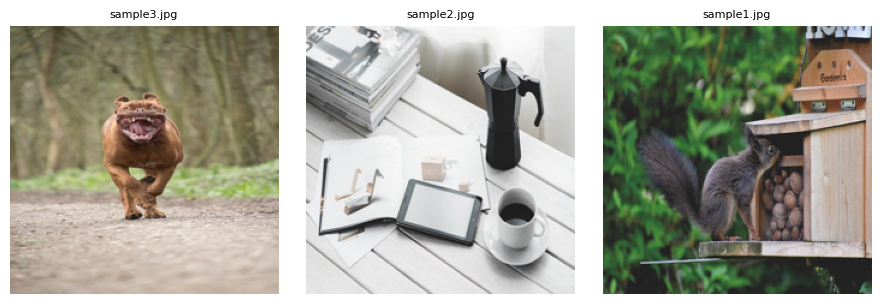

In [3]:
# To upload and Display Images in a Grid (Max 4 per row)

# Upload images
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

print("Please upload the image(s) you want to analyze.")
uploaded = files.upload()

input_image_paths = []
if uploaded:
    print("\nImage(s) uploaded successfully.")
    for filename in uploaded.keys():
        input_image_paths.append(filename)
        print(f" - '{filename}'")
else:
    print("\nUpload cancelled or failed.")

# Display images
max_cols = 4
img_size = (224, 224)  # Fixed display size per image

if input_image_paths:
    print("\nDisplaying uploaded images in grid format:")
    n_images = len(input_image_paths)
    n_rows = (n_images + max_cols - 1) // max_cols

    plt.figure(figsize=(max_cols * 3, n_rows * 3))

    for idx, image_path in enumerate(input_image_paths):
        try:
            img = Image.open(image_path).convert("RGB")
            img = img.resize(img_size)

            plt.subplot(n_rows, max_cols, idx + 1)
            plt.imshow(img)
            plt.title(os.path.basename(image_path), fontsize=8)
            plt.axis("off")
        except Exception as e:
            print(f"Error loading {image_path}: {e}")

    plt.tight_layout()
    plt.show()

In [4]:
# Object Detection Function - This function takes an image path and confidence threshold, performs detection and displays the annotated image.

def detect_with_model(image_path, model_name, confidence_threshold=0.5):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not read image: {image_path}")

    model = YOLO(model_name)
    results = model(image, conf=confidence_threshold)
    class_names = model.names
    annotated_image = image.copy()

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            confidence = float(box.conf[0])
            class_id = int(box.cls[0])
            label = f"{class_names[class_id]}: {confidence:.2f}"
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(annotated_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    return annotated_image

100%|██████████| 6.25M/6.25M [00:00<00:00, 392MB/s]



0: 640x448 1 dog, 49.4ms
Speed: 11.4ms preprocess, 49.4ms inference, 415.7ms postprocess per image at shape (1, 3, 640, 448)


100%|██████████| 49.7M/49.7M [00:01<00:00, 42.6MB/s]



0: 640x448 1 dog, 44.9ms
Speed: 1.7ms preprocess, 44.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


100%|██████████| 131M/131M [00:00<00:00, 330MB/s]



0: 640x448 1 dog, 58.2ms
Speed: 1.6ms preprocess, 58.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


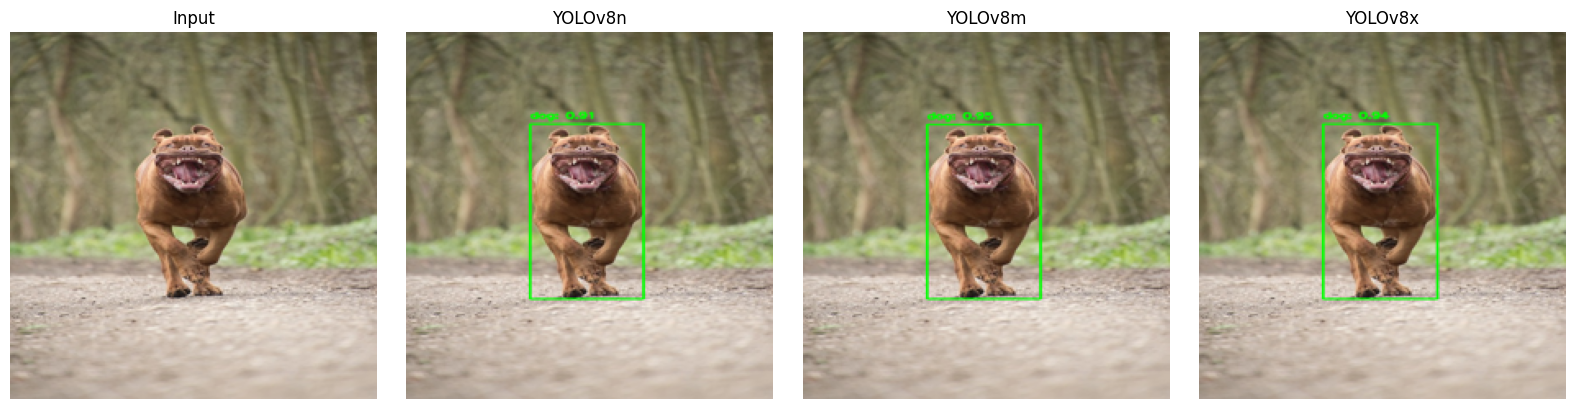


0: 448x640 1 cup, 1 laptop, 46.6ms
Speed: 1.7ms preprocess, 46.6ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 cup, 1 cell phone, 5 books, 43.5ms
Speed: 1.6ms preprocess, 43.5ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 cup, 1 cell phone, 3 books, 61.6ms
Speed: 1.7ms preprocess, 61.6ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)


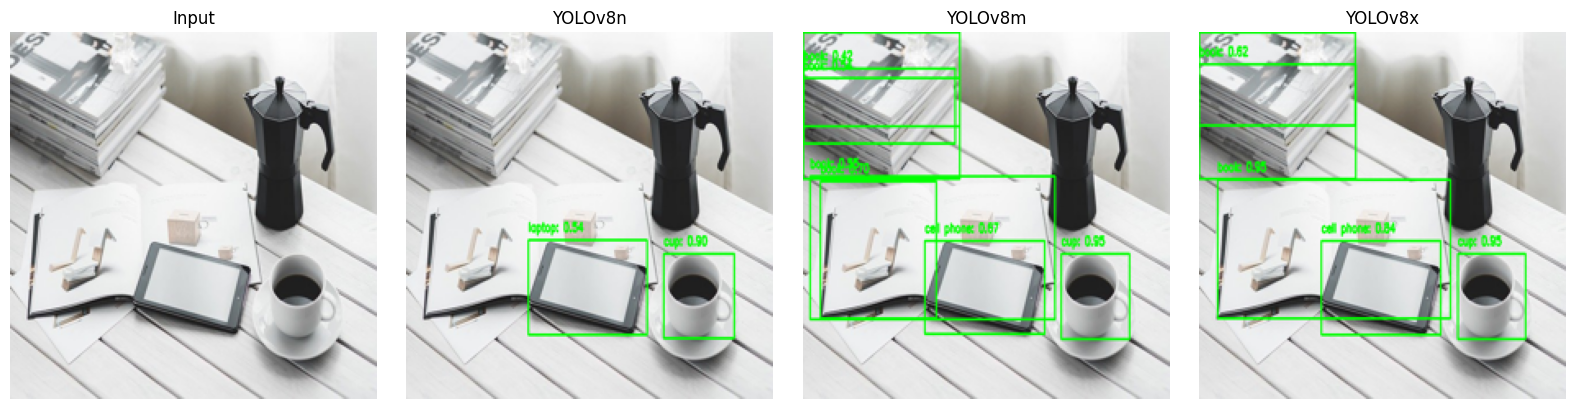


0: 448x640 1 cat, 8.0ms
Speed: 2.2ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 bear, 23.4ms
Speed: 1.6ms preprocess, 23.4ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 bird, 61.8ms
Speed: 1.6ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


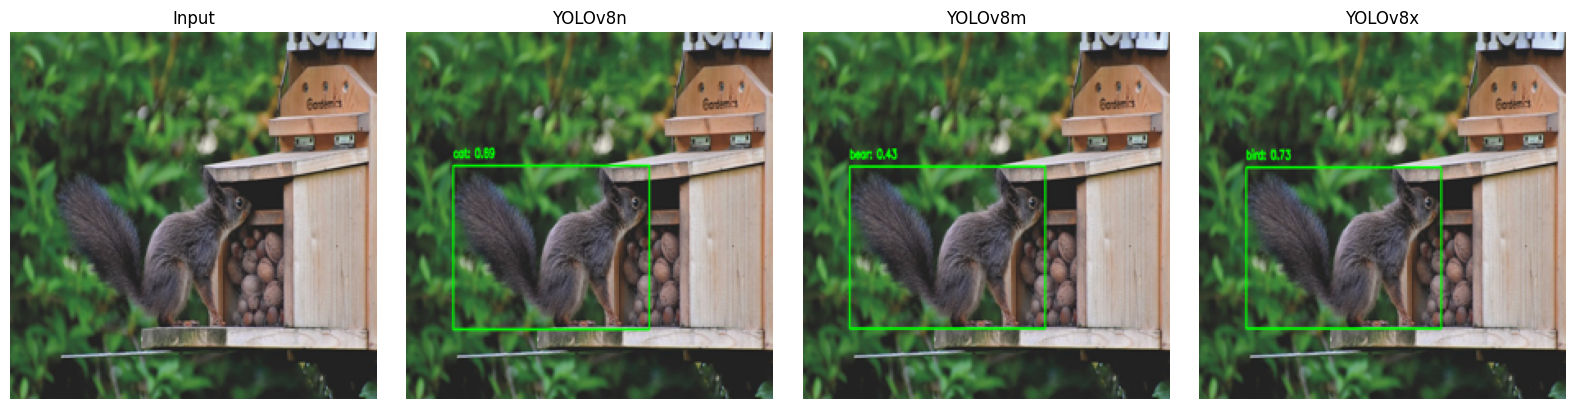

In [5]:
# To run all three YOLO models on each uploaded image and display results in grid

model_variants = {
    "YOLOv8n": "yolov8n.pt",
    "YOLOv8m": "yolov8m.pt",
    "YOLOv8x": "yolov8x.pt",
}

img_size = (224, 224)

for image_path in input_image_paths:
    try:
        original = Image.open(image_path).convert("RGB").resize(img_size)
        outputs = [original]

        for model_name in model_variants.values():
            annotated = detect_with_model(image_path, model_name, confidence_threshold=0.4)
            outputs.append(Image.fromarray(annotated).resize(img_size))

        # To display in one row: [input, yolov8n, yolov8m, yolov8x]
        plt.figure(figsize=(16, 4))
        titles = ["Input"] + list(model_variants.keys())

        for idx, img in enumerate(outputs):
            plt.subplot(1, 4, idx + 1)
            plt.imshow(img)
            plt.title(titles[idx])
            plt.axis("off")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {image_path}: {e}")